In [2]:
from matplotlib import pyplot as plt
import numpy as np 

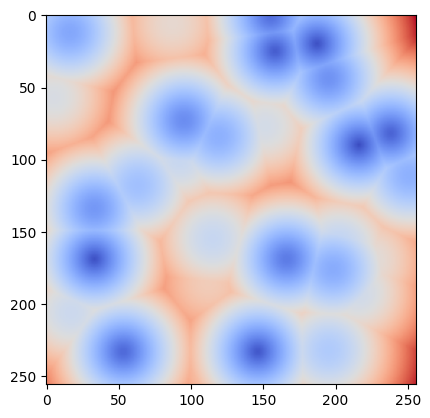

In [17]:
data = np.fromfile('pba_distances.dat', dtype=np.float32 ).reshape((256, 256, 256))
plt.imshow(data[69, :, :], cmap='coolwarm')

Boundary data shape: (256, 256, 256)
Boundary data type: uint8
Boundary value range: 0 to 1
Boundary points (value=1): 100 points
Non-boundary points (value=0): 16777116 points

✓ Boundary data looks correct (only 0s and 1s)
zero distance points: 1 points


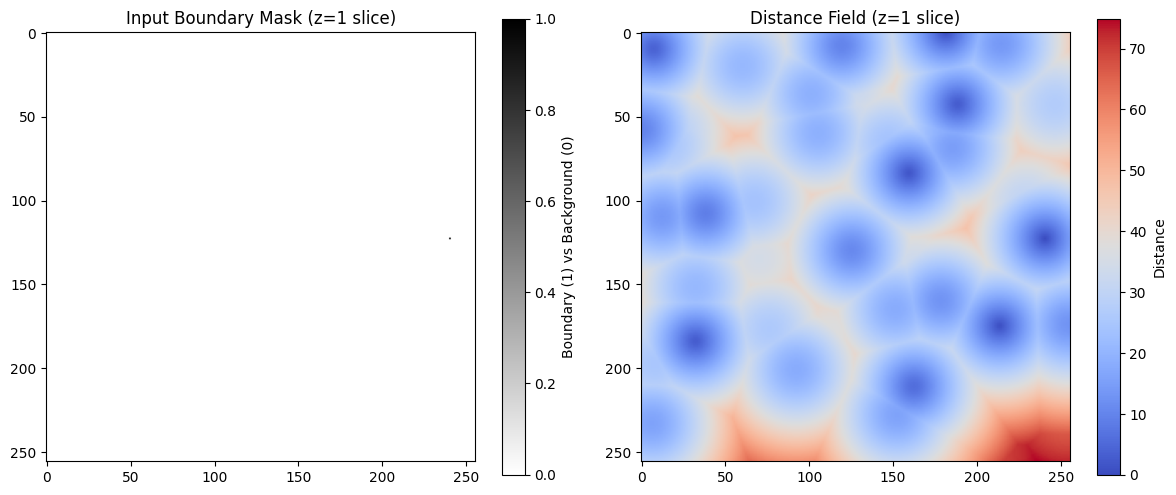

In [21]:
# Load and visualize the input boundary mask
# Note: C++ writes as 'char' which can be signed, but we use values 0,1 so uint8 is fine
boundary = np.fromfile('boundary_mask.dat', dtype=np.uint8).reshape((256, 256, 256))
print(f"Boundary data shape: {boundary.shape}")
print(f"Boundary data type: {boundary.dtype}")
print(f"Boundary value range: {boundary.min()} to {boundary.max()}")
print(f"Boundary points (value=1): {np.sum(boundary == 1)} points")
print(f"Non-boundary points (value=0): {np.sum(boundary == 0)} points")
print()

# Verify the data makes sense
if boundary.min() >= 0 and boundary.max() <= 1 and set(np.unique(boundary)) <= {0, 1}:
    print("✓ Boundary data looks correct (only 0s and 1s)")
else:
    print("⚠ Warning: Boundary data contains unexpected values!")
    print(f"Unique values: {np.unique(boundary)}")

# Show boundary points in the same slice as distance visualization
plt.figure(figsize=(12, 5))

locations = (204, slice(None), slice(None))  # Use all slices for both plots
# Plot 1: Boundary mask
plt.subplot(1, 2, 1)
plt.imshow(boundary[locations], cmap='binary', vmin=0, vmax=1)
plt.title('Input Boundary Mask (z=1 slice)')
plt.colorbar(label='Boundary (1) vs Background (0)')

print(f"zero distance points: {np.sum(data[locations] == 0)} points")
# Plot 2: Distance field for comparison
plt.subplot(1, 2, 2)
plt.imshow(data[locations], cmap='coolwarm')
plt.title('Distance Field (z=1 slice)')
plt.colorbar(label='Distance')

plt.tight_layout()
plt.show()

In [16]:
np.where(boundary ==1)

(array([  2,   2,   3,   4,   6,   6,  11,  14,  17,  17,  27,  29,  30,
         31,  33,  33,  36,  36,  38,  39,  41,  44,  47,  51,  51,  52,
         56,  57,  58,  61,  63,  66,  67,  69,  70,  70,  73,  74,  85,
         99, 101, 101, 103, 115, 116, 121, 122, 135, 140, 147, 148, 148,
        153, 160, 166, 167, 169, 169, 173, 176, 177, 178, 180, 180, 185,
        186, 190, 191, 194, 195, 198, 200, 201, 203, 204, 205, 206, 207,
        214, 215, 217, 218, 219, 220, 220, 222, 222, 223, 225, 225, 229,
        229, 233, 234, 234, 236, 236, 239, 245, 250]),
 array([ 70, 154,  72,  45,  77, 197, 187, 134, 131, 207, 185, 196, 243,
          6, 170, 211,  22,  77, 206,  99, 161, 232, 118,  84, 111, 176,
        134,  44,  73, 169,   1,  25, 233,  90,  20, 169,  82, 233,  12,
        155,  64, 192,  57, 243,  54,  84, 232, 250, 221,  55, 175, 253,
        189, 196, 209, 179,  89, 135,  54,  60,  43, 177,  66, 101,  37,
        165, 110, 174,   8, 108, 211,  10,  43,   0, 123, 175,  84, 1

In [ ]:
# Show multiple slices to understand 3D distribution
slice_indices = [0, 32, 64, 128, 192, 255]

plt.figure(figsize=(15, 10))

for i, z_slice in enumerate(slice_indices):
    # Boundary visualization
    plt.subplot(3, 6, i + 1)
    boundary_slice = boundary[:, :, z_slice]
    plt.imshow(boundary_slice, cmap='binary', vmin=0, vmax=1)
    plt.title(f'Boundary z={z_slice}')
    if i == 0:
        plt.ylabel('Boundary Mask')
    plt.axis('off')
    
    # Distance visualization
    plt.subplot(3, 6, i + 7)
    distance_slice = data[:, :, z_slice]
    plt.imshow(distance_slice, cmap='coolwarm')
    plt.title(f'Distance z={z_slice}')
    if i == 0:
        plt.ylabel('Distance Field')
    plt.axis('off')
    
    # Combined overlay
    plt.subplot(3, 6, i + 13)
    # Show distance field with boundary points highlighted
    plt.imshow(distance_slice, cmap='coolwarm', alpha=0.8)
    # Overlay boundary points in red
    boundary_points = np.where(boundary_slice == 1)
    if len(boundary_points[0]) > 0:
        plt.scatter(boundary_points[1], boundary_points[0], c='red', s=10, marker='x')
    plt.title(f'Combined z={z_slice}')
    if i == 0:
        plt.ylabel('Distance + Boundary')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical analysis and validation
print("=== EDT Results Analysis ===")
print(f"Volume size: {data.shape}")
print(f"Total voxels: {data.size:,}")
print(f"Boundary points: {np.sum(boundary == 1):,}")
print(f"Boundary density: {np.sum(boundary == 1) / data.size * 100:.4f}%")
print()

print("Distance statistics:")
print(f"  Min distance: {np.min(data):.3f}")
print(f"  Max distance: {np.max(data):.3f}")
print(f"  Mean distance: {np.mean(data):.3f}")
print(f"  Std distance: {np.std(data):.3f}")
print(f"  Zero distance points: {np.sum(data == 0):,} (should equal boundary points)")
print()

# Validation: All boundary points should have distance 0
boundary_distances = data[boundary == 1]
print("Validation checks:")
print(f"  All boundary points have distance 0: {np.all(boundary_distances == 0)}")
print(f"  Max distance at boundary points: {np.max(boundary_distances):.6f}")
print(f"  Min distance at non-boundary points: {np.min(data[boundary == 0]):.6f}")

# Distance distribution histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data.flatten(), bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution (All Points)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Exclude zero distances (boundary points) for better visualization
non_zero_distances = data[data > 0]
plt.hist(non_zero_distances, bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution (Non-boundary Points)')

plt.tight_layout()
plt.show()

In [8]:
data.size/256/256

256.0